In [2]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt
import numpy as np
import os

# Cargar los modelos previamente entrenados

A continuación evaluaremos los modelos previamente entrenado, capturaremos video y evaluaremos el modelos con la secuencia capturada.

In [3]:

# Obtener la ruta actual de trabajo
HOME = os.getcwd()

# Cargar el modelo YOLOv8 previamente entrenado
model_path = f"{HOME}/runs/train/yolo/weights/best.pt" 
model = YOLO(model_path)


# # Cargar el modelo YOLOv8 previamente entrenado
# model_path = f"{HOME}/runs/train/yolo_aug/weights/best.pt"
# model_aug = YOLO(model_path)

# Funciones definidas

In [4]:
from IPython.display import Image, display
def evaluarVideo(modelo):
    """Captura video y segmenta la captura

    Args:
        modelo (YOLO): Modelo con el cual se evaluara
    """    
    
    # Iniciar la captura de video desde la cámara (0 = cámara por defecto)
    cap = cv2.VideoCapture(0)

    if not cap.isOpened():
        print("Error: No se pudo abrir la cámara.")
        exit()

    # Configurar matplotlib para modo interactivo
    plt.ion()
    fig, ax = plt.subplots(figsize=(10, 6))

    # Bucle para capturar video continuamente
    while True:
        # Capturar un frame de la cámara
        ret, frame = cap.read()
        if not ret:
            print("Error: No se pudo capturar el frame.")
            break

        # Redimensionar el frame para garantizar un tamaño compatible con el modelo (por ejemplo, 640x640)
        resized_frame = cv2.resize(frame, (640, 640))

        # Realizar la predicción de segmentación
        results = modelo.predict(resized_frame, conf=0.5, iou=0.5, verbose=False)

        # Extraer la cantidad de instancias detectadas
        num_instances = len(results[0].boxes)
        print(f"Cantidad de instancias detectadas: {num_instances}")

        # Dibujar las segmentaciones en el frame
        annotated_frame = results[0].plot()

        # Convertir el frame anotado de BGR a RGB para matplotlib
        annotated_frame_rgb = cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB)

        # Mostrar el frame anotado con matplotlib
        ax.clear()
        ax.imshow(annotated_frame_rgb)
        ax.set_title(f"Cantidad de instancias detectadas: {num_instances}")
        ax.axis('off')
        plt.draw()
        plt.pause(0.01)

        # Salir del bucle al cerrar la ventana de matplotlib
        if not plt.fignum_exists(fig.number):
            break

    # Liberar la cámara y cerrar la ventana de matplotlib
    cap.release()
    plt.close()

# Caoturas de video evaluadas

A continuación evaluaremos diferentes cappturas de video con los modelo previamente evaluados.

Cantidad de instancias detectadas: 2


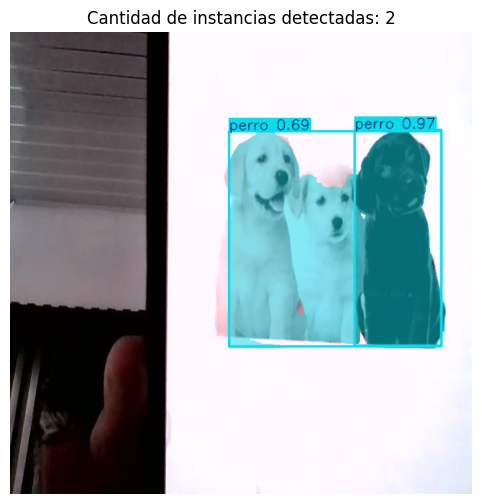

In [10]:
evaluarVideo(model)